In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

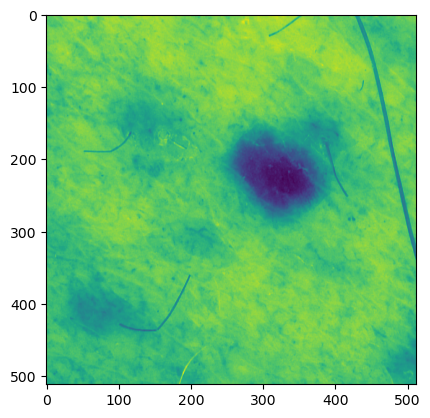

In [4]:
imshow(images[100])

In [5]:
masks.shape

(12311, 512, 512, 1)

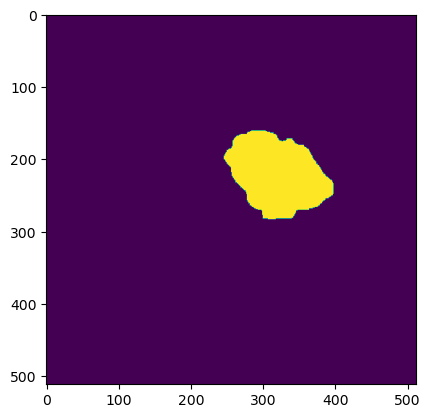

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmp65x6wf0ekuc_unet2d


In [11]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmp65x6wf0ekuc_unet2d
Verbose mode active!


In [12]:
R.classifier = C ### use custom classifier

In [13]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [14]:
R.setup_data(images, masks, dataset_size=12311, weights=weights)

Weights OK!


In [15]:
RUNS = 18

In [16]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier(batch_size=16)
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
39/39 [==============================] - 37s 687ms/step - loss: 0.5644 - dice_coeff: 0.3018 - val_loss: 0.5391 - val_dice_coeff: 0.3107
Epoch 2/100
39/39 [==============================] - 19s 489ms/step - loss: 0.4849 - dice_coeff: 0.3548 - val_loss: 0.4590 - val_dice_coeff: 0.4185
Epoch 3/100
39/39 [==============================] - 19s 494ms/step - loss: 0.4468 - dice_coeff: 0.4250 - val_loss: 0.4315 - val_dice_coeff: 0.5083
Epoch 4/100
39/39 [==============================] - 19s 489ms/step - loss: 0.4095 - dice_coeff: 0.5196 - val_loss: 0.3886 - val_dice_coeff: 0.5679
Epoch 5/100
39/39 [==============================] - 19s 503ms/step - loss: 0.3935 - dice_coeff: 0.5430 - val_loss: 0.3851 - val_dice_coeff: 0.5627
Epoch 6/100
39/39 [==============================] - 19s 495ms/step - loss: 0.3863 - dice_coeff: 0.5561 - val_loss: 0.3823 - val_dice_coeff: 0.5708
Epoch 7/100
39/39 [==============================] - 19s 488ms/step - loss: 0.3994 - dice_coeff: 0.54

Epoch 2/100
86/86 [==============================] - 31s 361ms/step - loss: 0.3821 - dice_coeff: 0.5741 - val_loss: 0.3842 - val_dice_coeff: 0.5640
Epoch 3/100
86/86 [==============================] - 32s 368ms/step - loss: 0.3743 - dice_coeff: 0.5797 - val_loss: 0.3933 - val_dice_coeff: 0.6041
Epoch 4/100
86/86 [==============================] - 31s 364ms/step - loss: 0.3815 - dice_coeff: 0.5731 - val_loss: 0.3625 - val_dice_coeff: 0.5987
Epoch 5/100
86/86 [==============================] - 31s 363ms/step - loss: 0.3702 - dice_coeff: 0.5900 - val_loss: 0.3661 - val_dice_coeff: 0.6166
Epoch 6/100
86/86 [==============================] - 31s 365ms/step - loss: 0.3596 - dice_coeff: 0.6026 - val_loss: 0.3455 - val_dice_coeff: 0.6263
Epoch 7/100
86/86 [==============================] - 31s 365ms/step - loss: 0.3505 - dice_coeff: 0.6133 - val_loss: 0.3403 - val_dice_coeff: 0.6227
Epoch 8/100
86/86 [==============================] - 31s 364ms/step - loss: 0.3559 - dice_coeff: 0.6091 - val_lo

116/116 [==============================] - 39s 339ms/step - loss: 0.2730 - dice_coeff: 0.7026 - val_loss: 0.2594 - val_dice_coeff: 0.7041
Epoch 9/100
116/116 [==============================] - 39s 340ms/step - loss: 0.2653 - dice_coeff: 0.7113 - val_loss: 0.2586 - val_dice_coeff: 0.7371
Epoch 10/100
116/116 [==============================] - 39s 337ms/step - loss: 0.2628 - dice_coeff: 0.7145 - val_loss: 0.2520 - val_dice_coeff: 0.7352
Epoch 11/100
116/116 [==============================] - 40s 343ms/step - loss: 0.2586 - dice_coeff: 0.7176 - val_loss: 0.2543 - val_dice_coeff: 0.7177
Epoch 12/100
116/116 [==============================] - 39s 336ms/step - loss: 0.2623 - dice_coeff: 0.7138 - val_loss: 0.2477 - val_dice_coeff: 0.7475
Epoch 13/100
116/116 [==============================] - 39s 337ms/step - loss: 0.2607 - dice_coeff: 0.7171 - val_loss: 0.2562 - val_dice_coeff: 0.7346
Model saved to: /tmp/tmp65x6wf0ekuc_unet2d/kuc_unet2d_10kuc_unet2d_model
History saved to: /tmp/tmp65x6wf0ek

155/155 [==============================] - 49s 316ms/step - loss: 0.2296 - dice_coeff: 0.7508 - val_loss: 0.2449 - val_dice_coeff: 0.7621
Epoch 8/100
155/155 [==============================] - 49s 316ms/step - loss: 0.2178 - dice_coeff: 0.7654 - val_loss: 0.2622 - val_dice_coeff: 0.7528
Model saved to: /tmp/tmp65x6wf0ekuc_unet2d/kuc_unet2d_15kuc_unet2d_model
History saved to: /tmp/tmp65x6wf0ekuc_unet2d/kuc_unet2d_history_15.pkl
Testing the classifier...
Testing the discriminator...
24/24 [==============================] - 1s 36ms/step - loss: 0.0114 - accuracy: 0.9986
Found 373 machine labels.
Replacing 124 from 373 !
D_relabeled_ 124
point ids 124
Removed: 124 Filled: 124
TOOK 537.8335146903992 seconds
***
RUN: 16
Epoch 1/100
162/162 [==============================] - 52s 319ms/step - loss: 0.2119 - dice_coeff: 0.7713 - val_loss: 0.2452 - val_dice_coeff: 0.7520
Epoch 2/100
162/162 [==============================] - 51s 315ms/step - loss: 0.2065 - dice_coeff: 0.7758 - val_loss: 0.2448 

Epoch 11/100
169/169 [==============================] - 53s 313ms/step - loss: 0.0608 - dice_coeff: 0.9372 - val_loss: 0.4171 - val_dice_coeff: 0.7766
Epoch 12/100
169/169 [==============================] - 53s 315ms/step - loss: 0.0635 - dice_coeff: 0.9342 - val_loss: 0.4572 - val_dice_coeff: 0.7763
Epoch 13/100
169/169 [==============================] - 53s 313ms/step - loss: 0.0555 - dice_coeff: 0.9425 - val_loss: 0.5153 - val_dice_coeff: 0.7856
Epoch 14/100
169/169 [==============================] - 53s 313ms/step - loss: 0.0509 - dice_coeff: 0.9473 - val_loss: 0.4997 - val_dice_coeff: 0.7838
Epoch 15/100
169/169 [==============================] - 53s 314ms/step - loss: 0.0517 - dice_coeff: 0.9463 - val_loss: 0.4893 - val_dice_coeff: 0.7817
Epoch 16/100
169/169 [==============================] - 53s 314ms/step - loss: 0.0593 - dice_coeff: 0.9387 - val_loss: 0.3762 - val_dice_coeff: 0.7769
Model saved to: /tmp/tmp65x6wf0ekuc_unet2d/kuc_unet2d_17kuc_unet2d_model
History saved to: /tm

In [17]:
R.classifier_scores # after 18 runs of GP2

[[0.41537895798683167, 0.5521144270896912],
 [0.40209144353866577, 0.5728970170021057],
 [0.4016678035259247, 0.5843569040298462],
 [0.4191456139087677, 0.5603228211402893],
 [0.39804258942604065, 0.57065749168396],
 [0.39351537823677063, 0.580609917640686],
 [0.3262425661087036, 0.6776300668716431],
 [0.3801702857017517, 0.6356633901596069],
 [0.2859831154346466, 0.6957279443740845],
 [0.2848091721534729, 0.6974177956581116],
 [0.26466792821884155, 0.7329614758491516],
 [0.2602810859680176, 0.7178581357002258],
 [0.25629106163978577, 0.7372784614562988],
 [0.26982760429382324, 0.7226859331130981],
 [0.2617640197277069, 0.7479315400123596],
 [0.26506105065345764, 0.7522574067115784],
 [0.3996071219444275, 0.7783516049385071],
 [0.3875712454319, 0.771949827671051]]

In [18]:
R.discriminator_scores # after 18 runs of GP2

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0013087212573736906, 0.998645007610321],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0006797179812565446, 1.0],
 [0.011414173990488052, 0.998645007610321],
 [0.0, 1.0],
 [0.0010883179493248463, 0.998645007610321],
 [0.0, 1.0],
 [0.011392606422305107, 0.998645007610321],
 [0.010880894958972931, 0.998645007610321],
 [0.0, 1.0]]

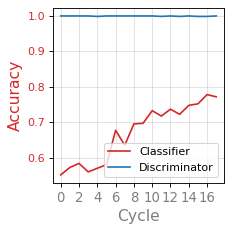

In [19]:
R.plot() # after 18 runs of GP2

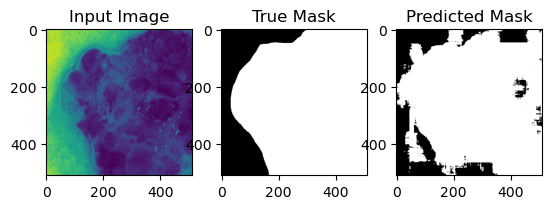

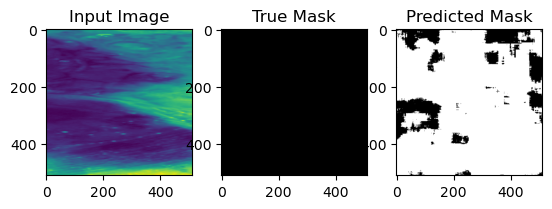

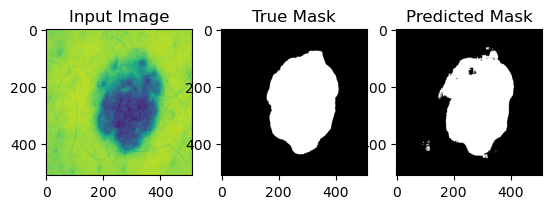

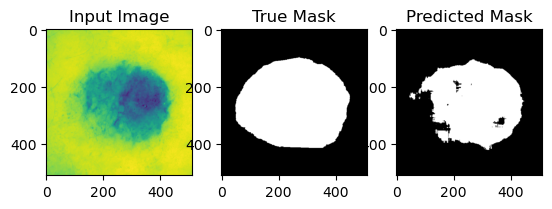

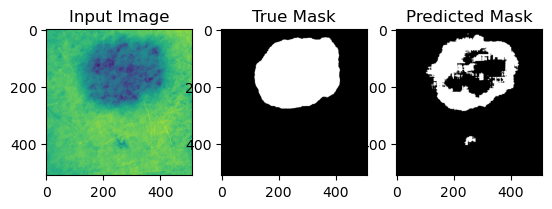

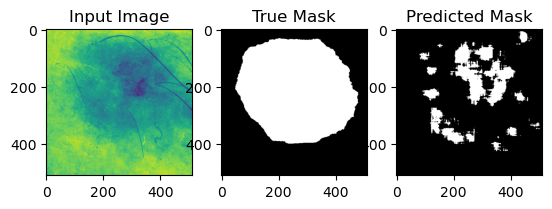

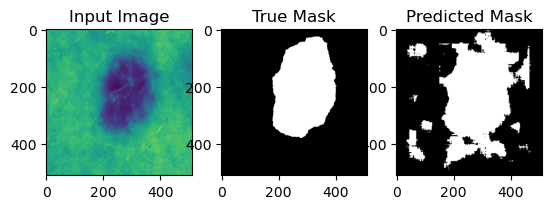

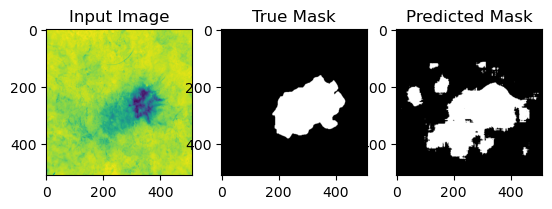

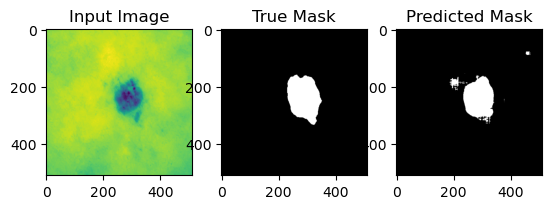

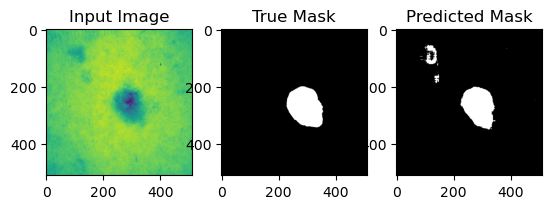

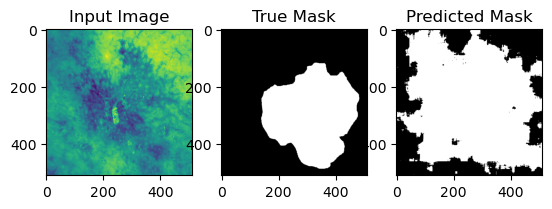

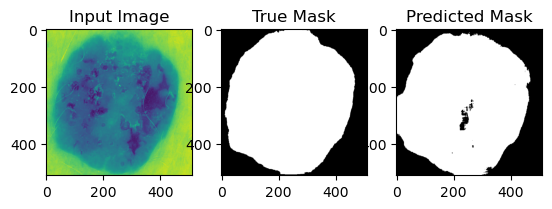

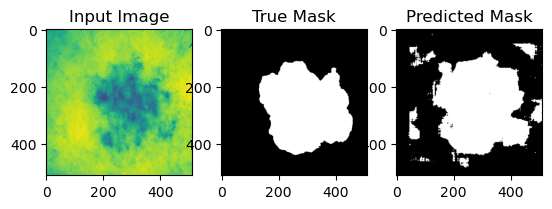

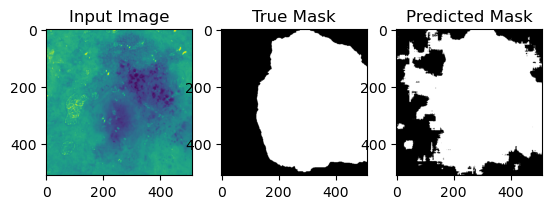

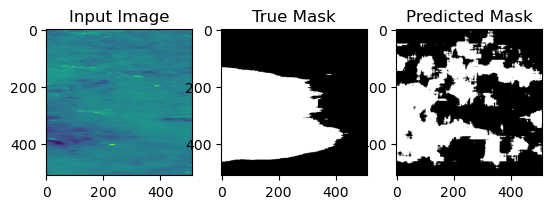

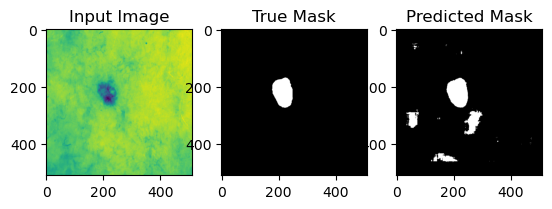

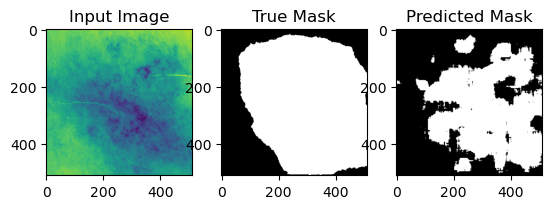

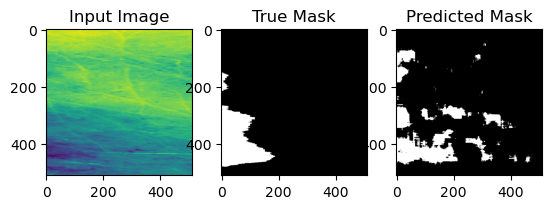

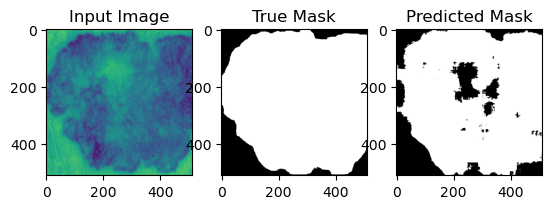

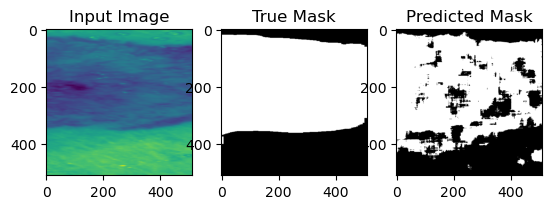

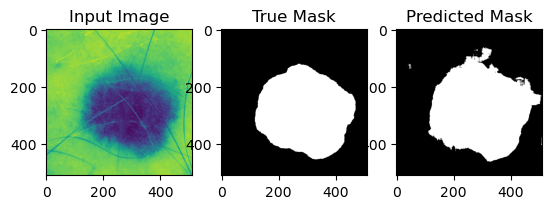

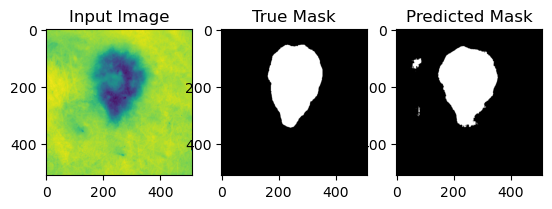

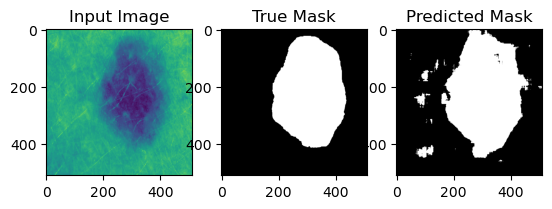

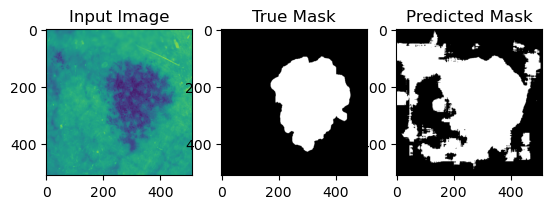

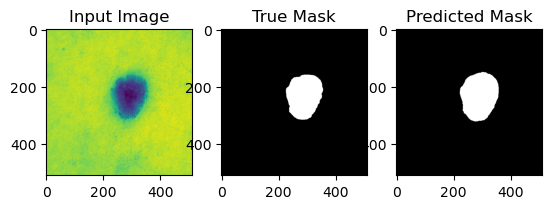

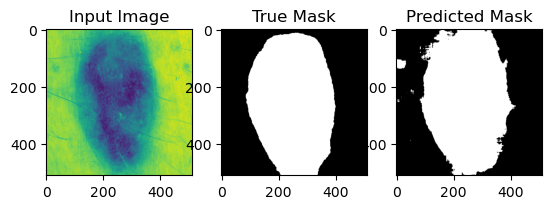

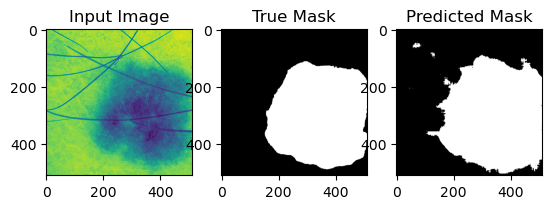

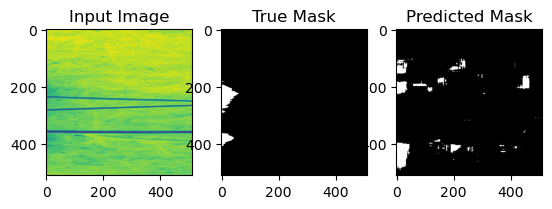

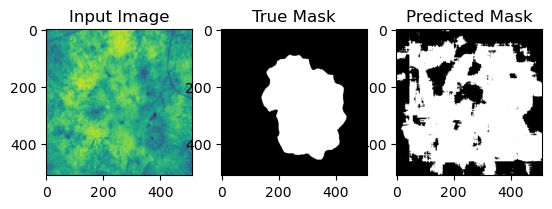

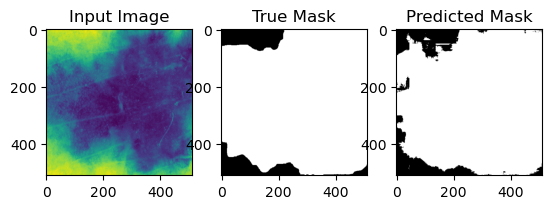

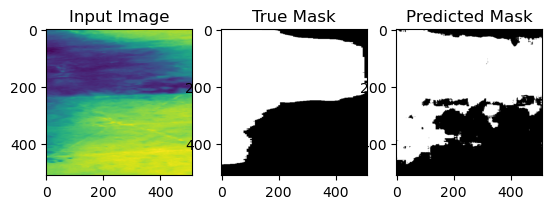

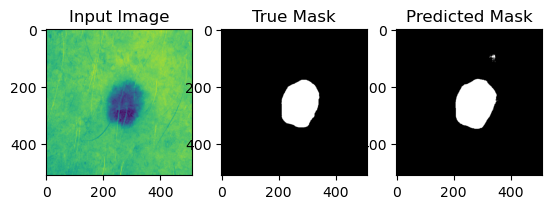

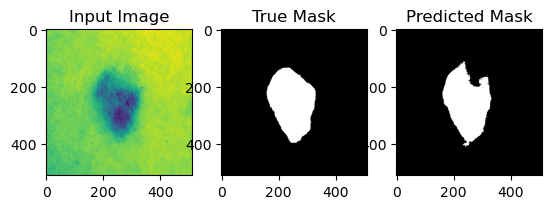

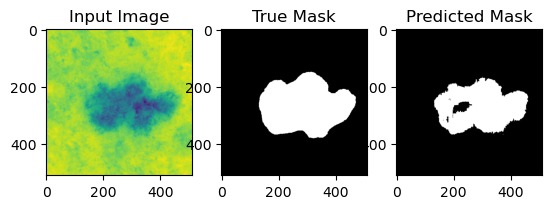

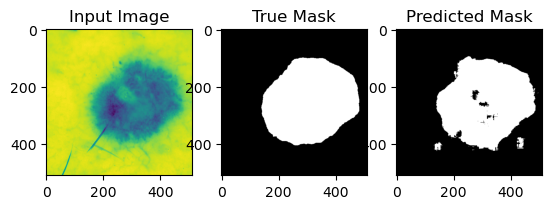

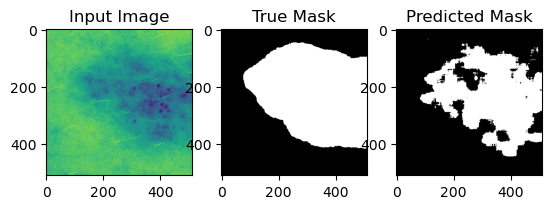

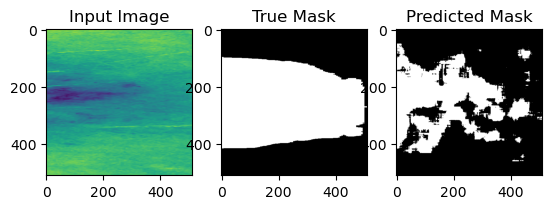

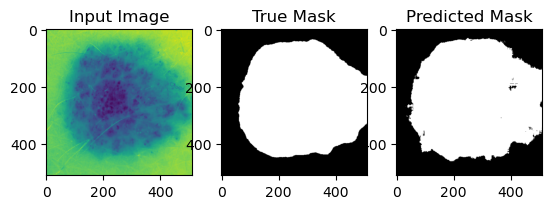

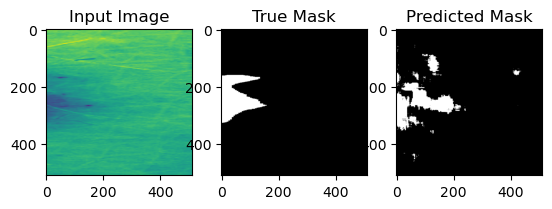

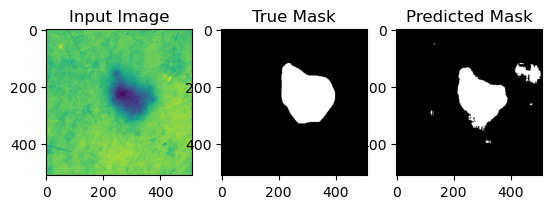

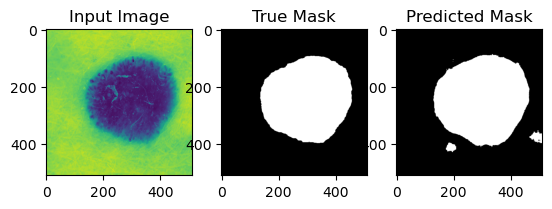

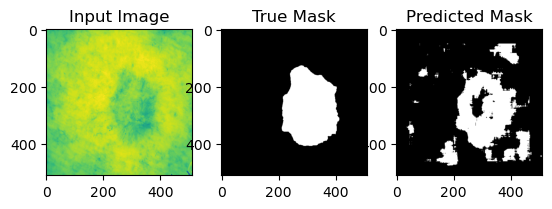

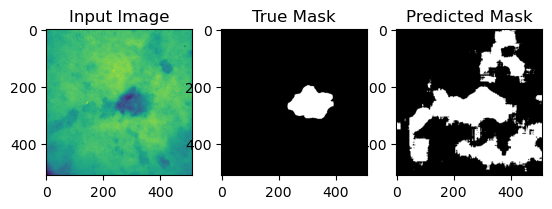

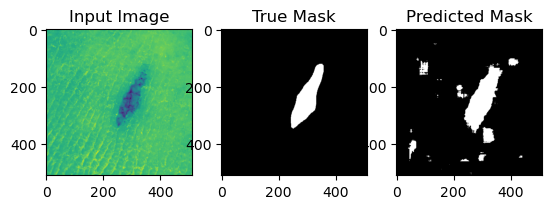

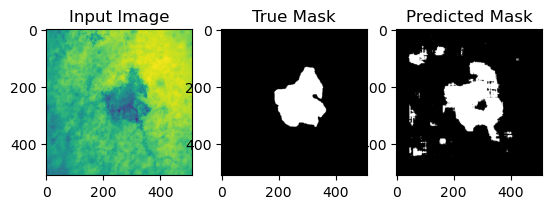

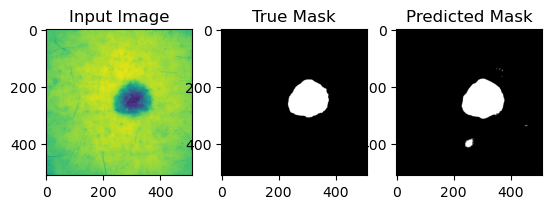

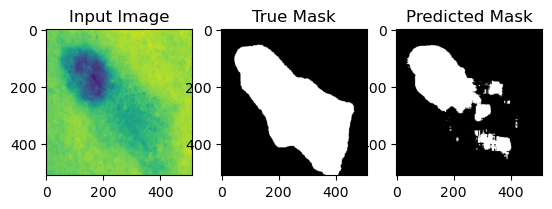

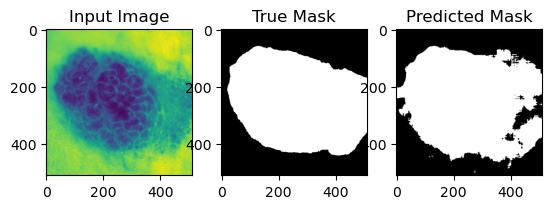

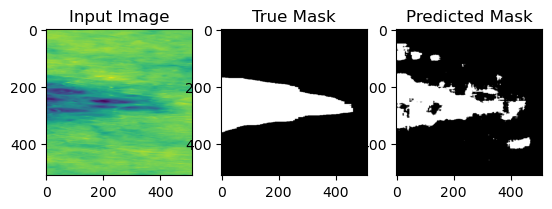

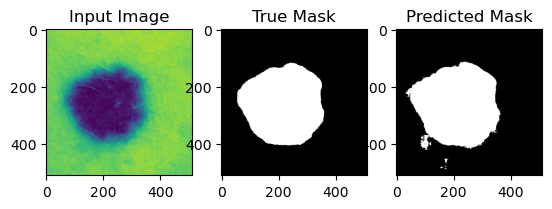

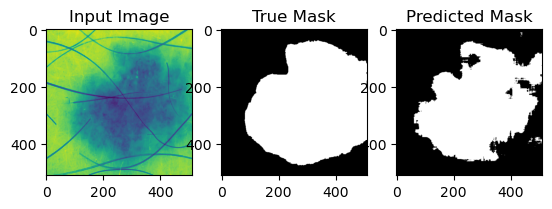

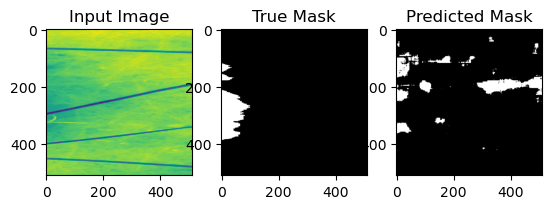

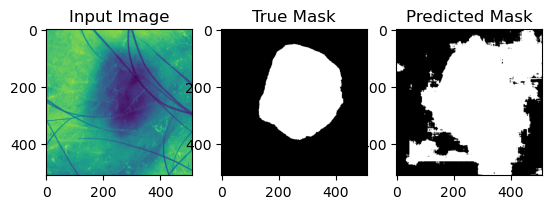

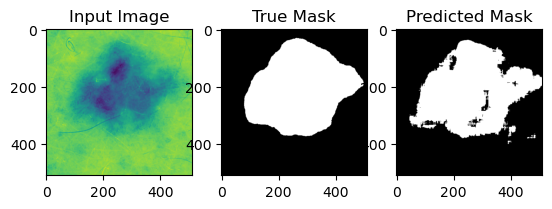

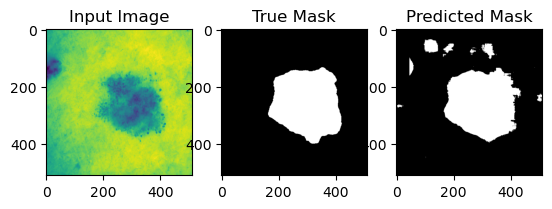

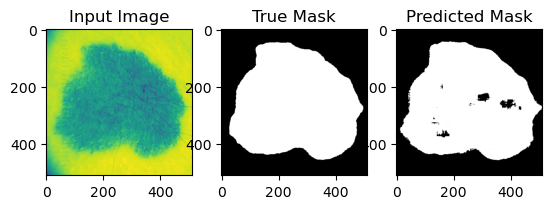

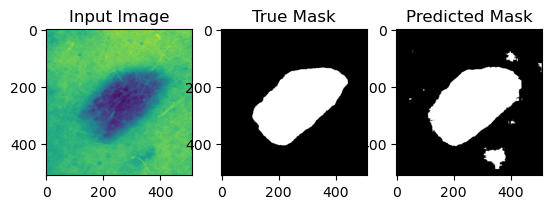

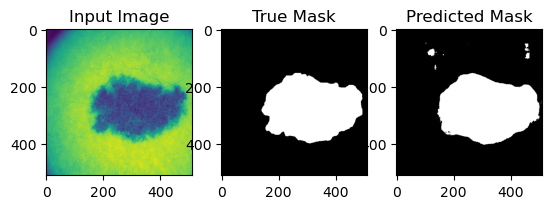

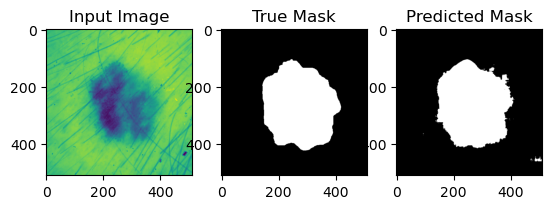

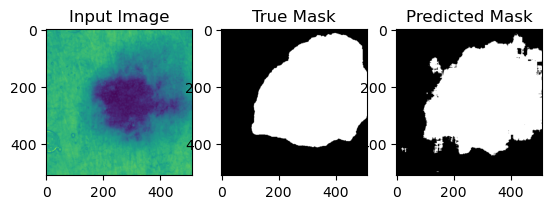

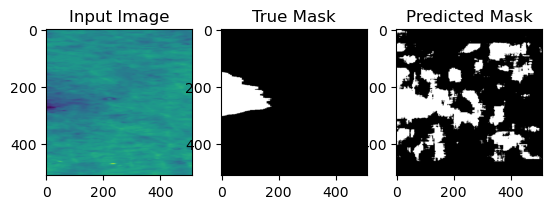

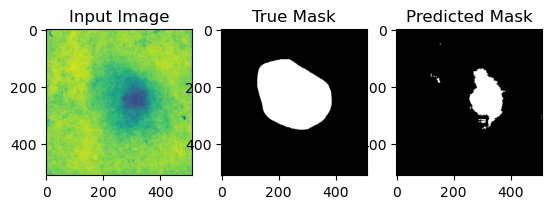

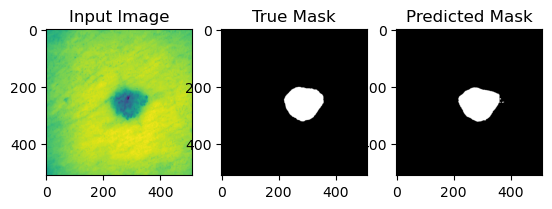

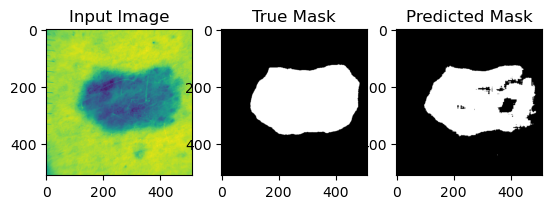

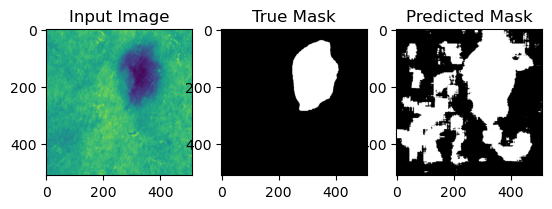

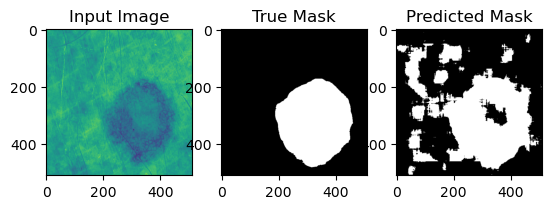

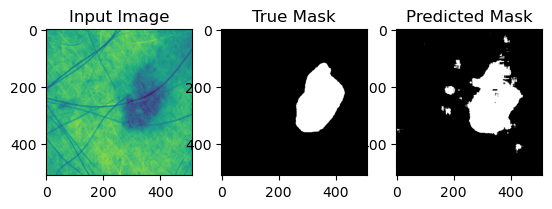

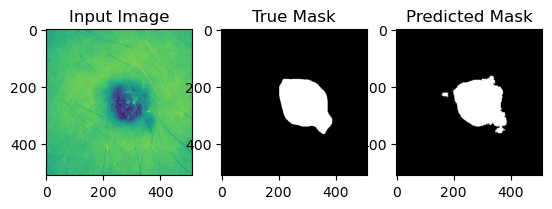

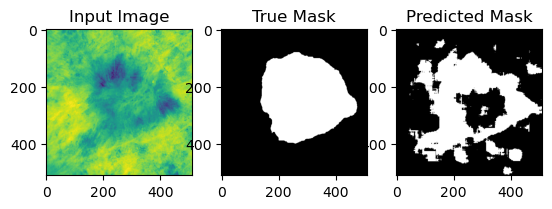

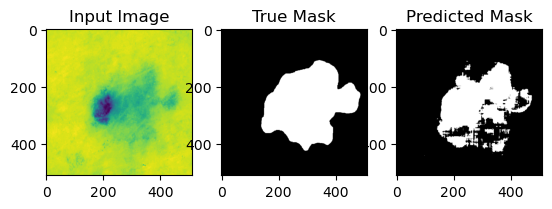

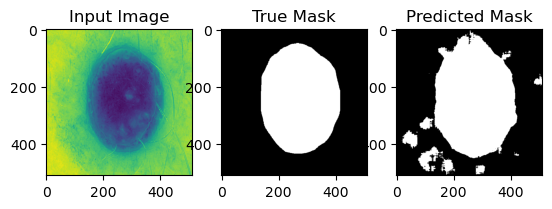

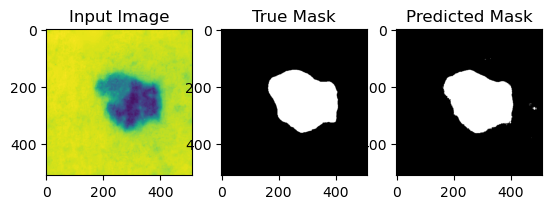

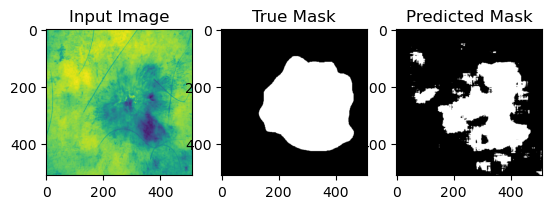

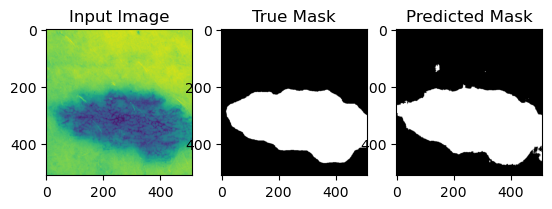

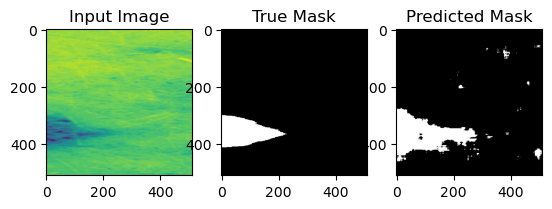

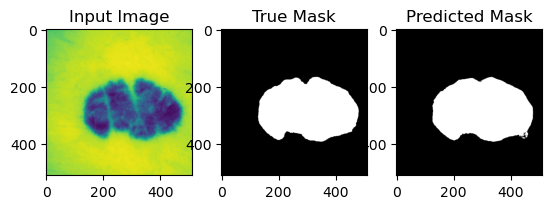

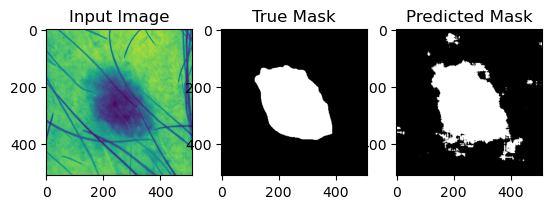

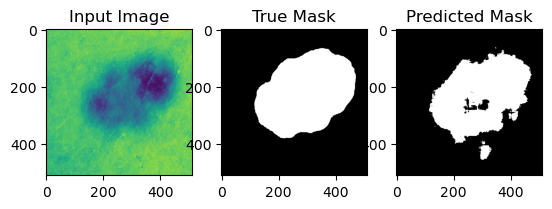

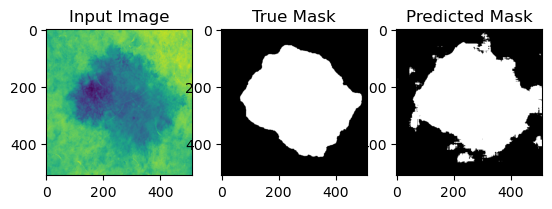

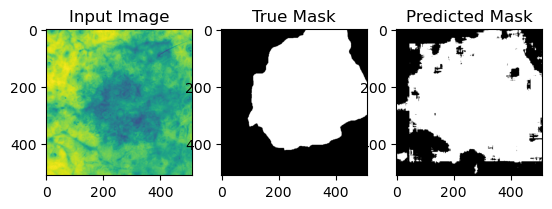

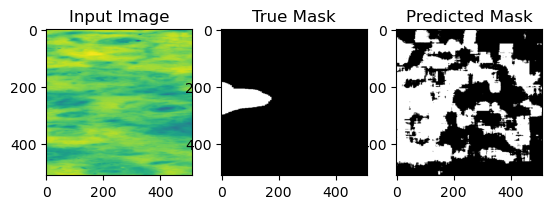

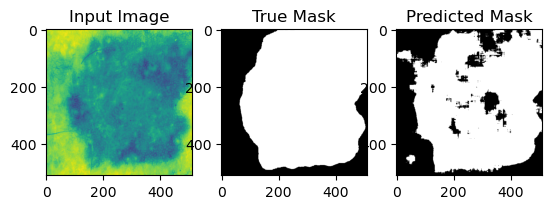

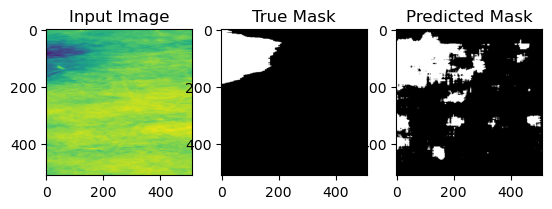

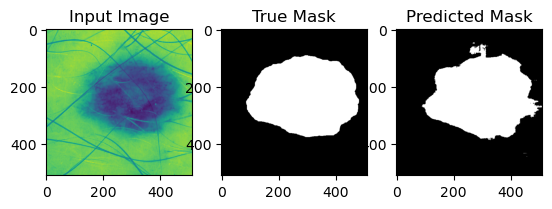

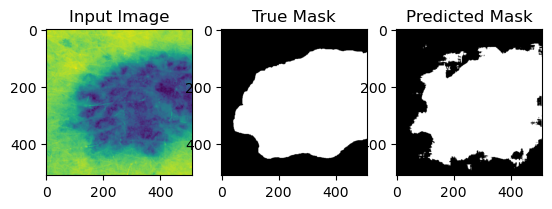

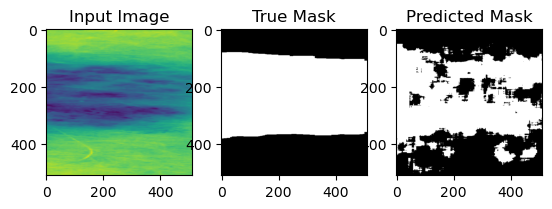

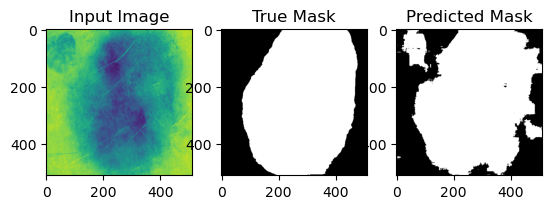

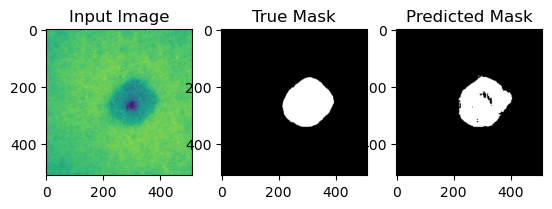

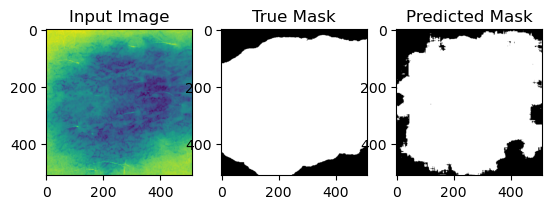

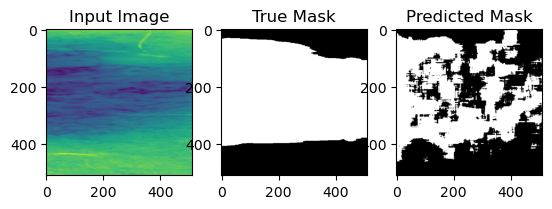

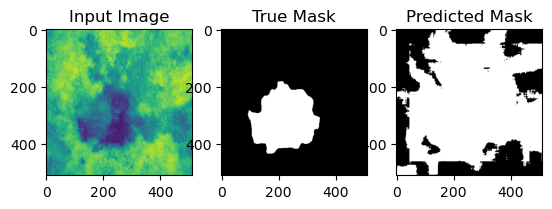

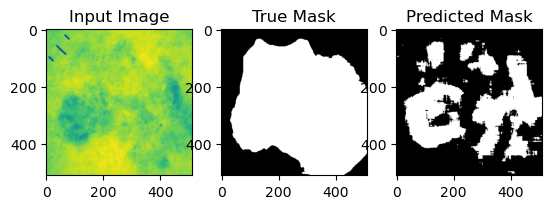

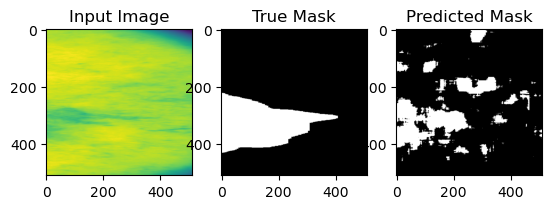

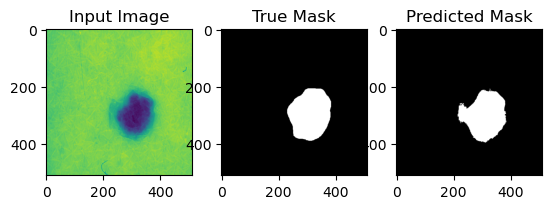

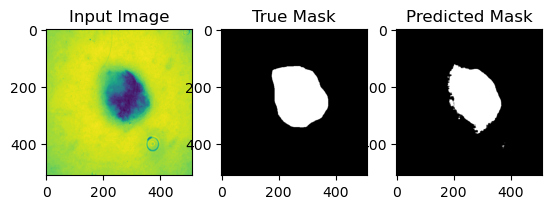

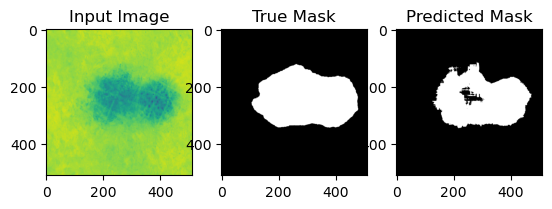

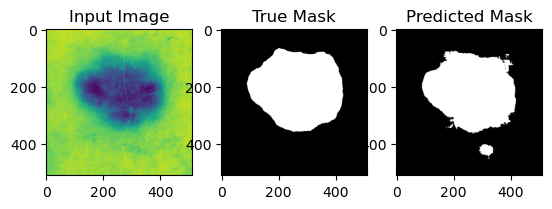

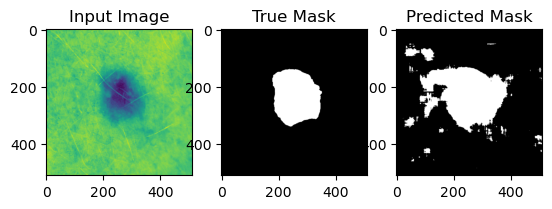

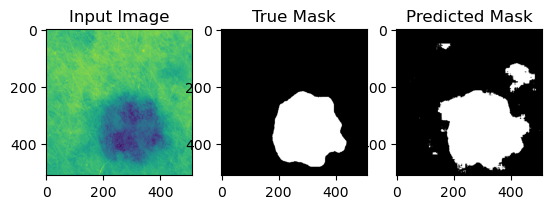

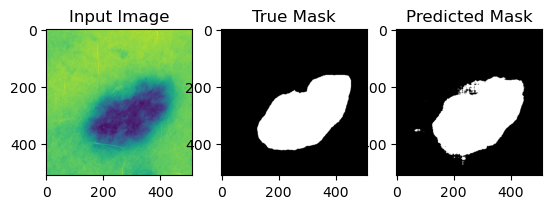

In [20]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100) # after 18 runs of GP2